 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_df = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Check data type for each column
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
# Count nulls
whale_returns_df.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Check data type for each column
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [9]:
# Count nulls
algo_returns_df.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df = pd.read_csv("sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df = sp_tsx_history_df.sort_index()
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Check nulls
sp_tsx_history_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$","")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",","")
sp_tsx_history_df.head()

<ipython-input-15-2341aa0c5bd4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$","")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [16]:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")
sp_tsx_history_df["Close"].dtypes

dtype('float64')

In [17]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [18]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.columns = ["S&P TSX 60"]
sp_tsx_daily_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_daily_returns], axis="columns", join="inner" )
combined_daily_returns.sort_index()
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

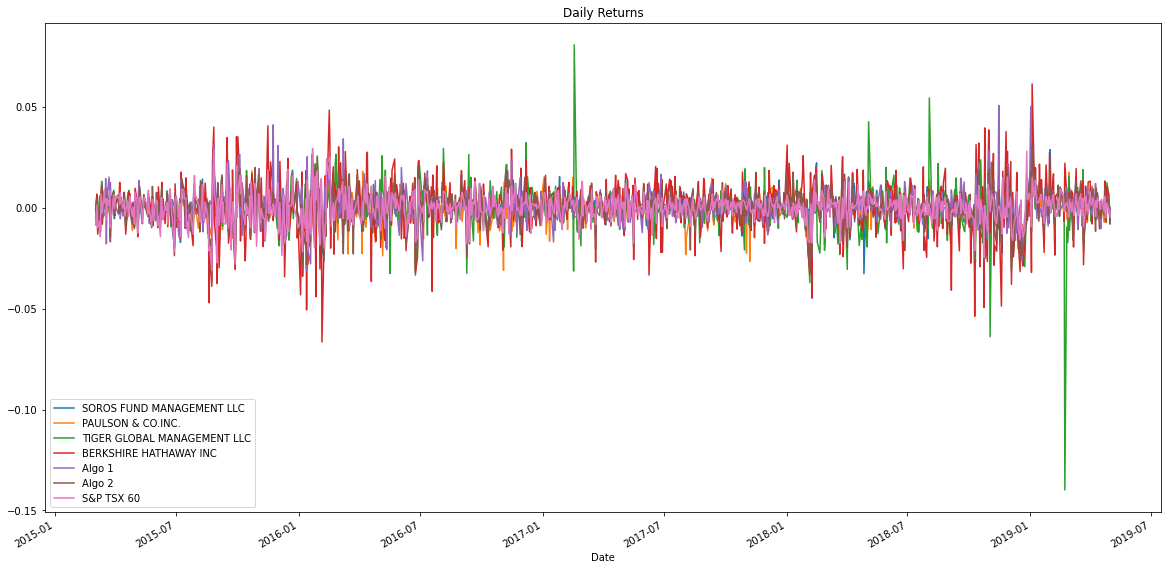

In [21]:
# Plot daily returns of all portfolios
combined_daily_returns.plot(figsize=(20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

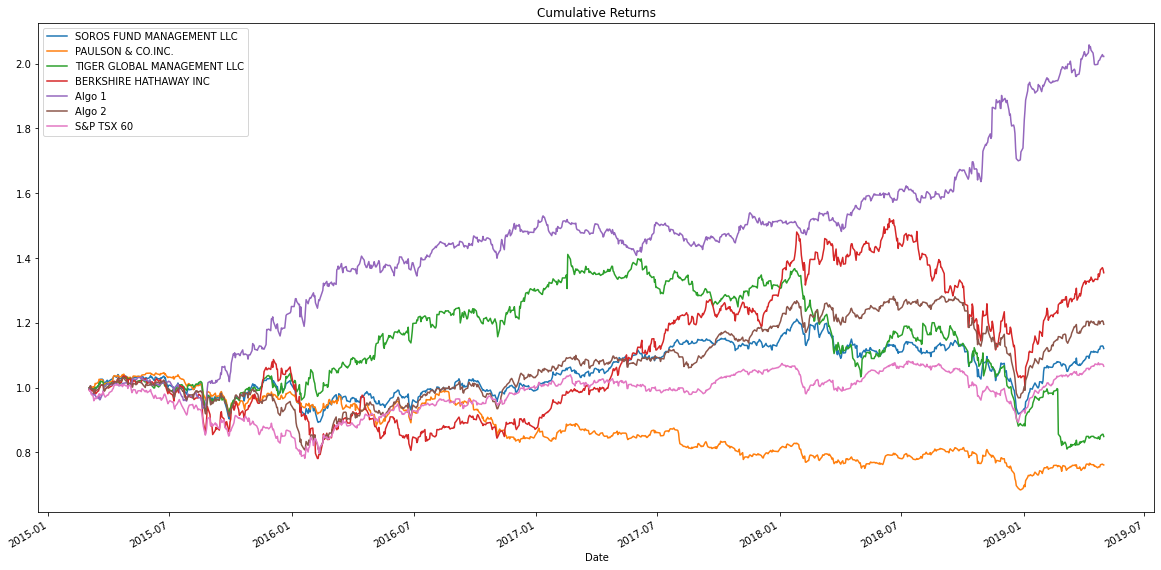

In [22]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_daily_returns).cumprod()

# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

# Anaylze if any portfolios outperform the S&P TSX 60?
Based on cumulative returns, all stocks have/had better performance at some points. But, only Algo 1, Berkshire, Algo 2 and Soros Fund have greater cumulative returns by the end of the observation period. Among them, the cumulative return of Algo 1 is the biggest. And, compared to other stocks, the increasing trend looks more consistent.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot'}>

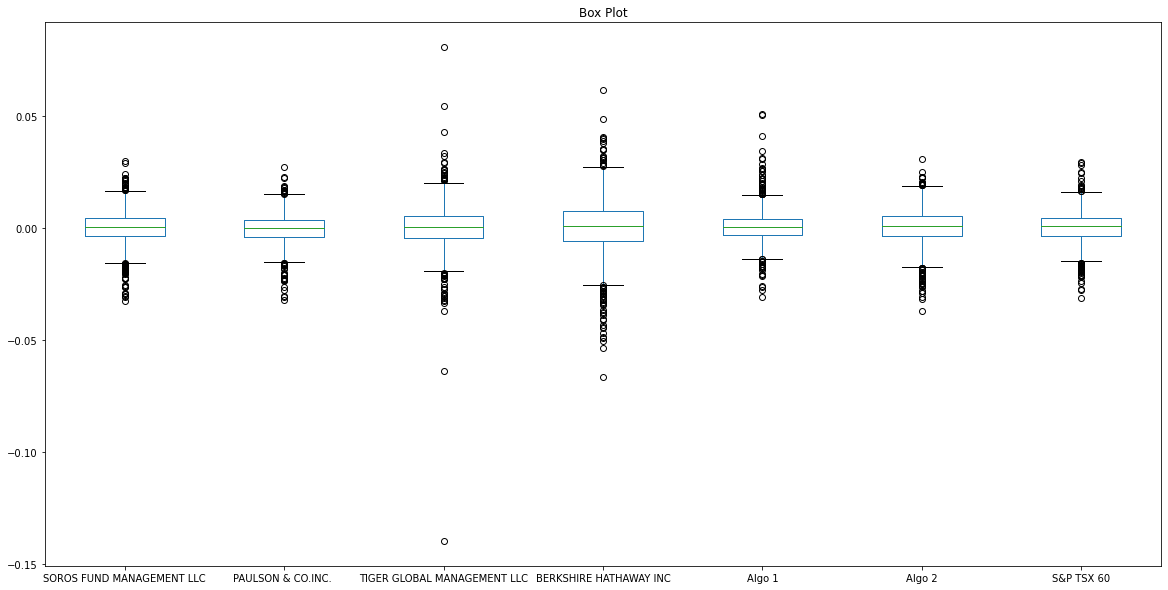

In [23]:
# Box plot to visually show risk
combined_daily_returns.plot.box(figsize=(20,10), title="Box Plot")

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_daily_returns.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = combined_std["S&P TSX 60"]
print(f"The daily standard deviation of S&P TSX 60 is {sp_tsx_std}")


The daily standard deviation of S&P TSX 60 is 0.007034167748577725


In [26]:
# Determine which portfolios are riskier than the S&P TSX 60
risk_compare = combined_std > combined_std["S&P TSX 60"]
risk_compare.replace(True,"Riskier than S&P TSX 60").drop("S&P TSX 60").replace(False, "Less risk than S&P TSX 60")


BERKSHIRE HATHAWAY INC           Riskier than S&P TSX 60
TIGER GLOBAL MANAGEMENT LLC      Riskier than S&P TSX 60
Algo 2                           Riskier than S&P TSX 60
SOROS FUND MANAGEMENT LLC        Riskier than S&P TSX 60
Algo 1                           Riskier than S&P TSX 60
PAULSON & CO.INC.              Less risk than S&P TSX 60
dtype: object

### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_std * np.sqrt(252)
combined_annualized_std = combined_annualized_std.sort_values(ascending=False)
combined_annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_21_days = combined_daily_returns.rolling(window=21).std()
combined_std_21_days.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356
2019-04-30,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240
2019-05-01,0.004271,0.005009,0.005744,0.006143,0.004972,0.005686,0.003150


<AxesSubplot:xlabel='Date'>

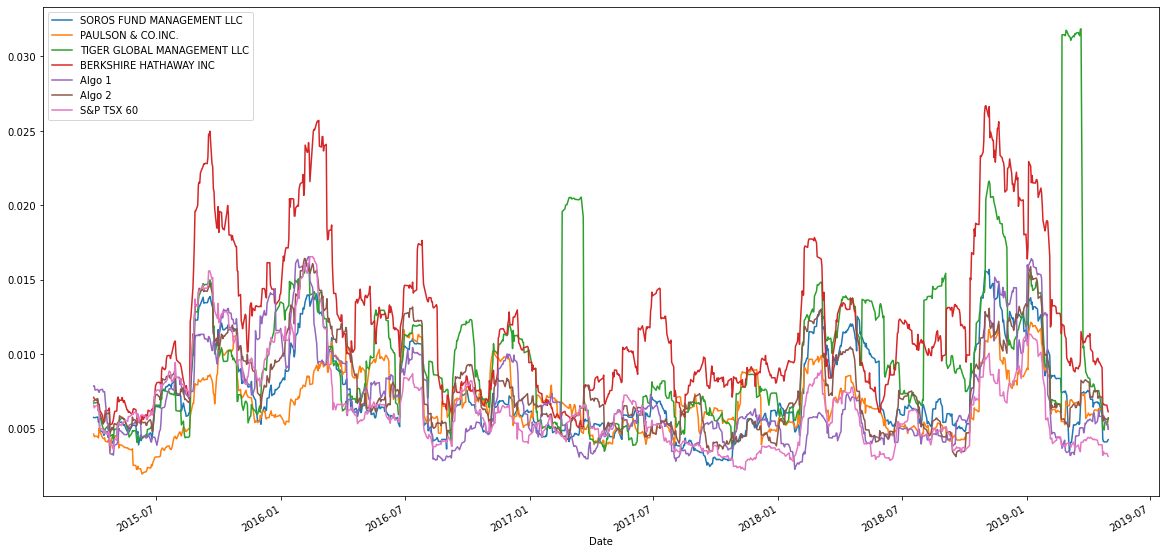

In [29]:
# Plot the rolling standard deviation
combined_std_21_days.plot(figsize=(20,10))

### Calculate and plot the correlation

In [30]:
# Calculate the correlation
correlation = combined_daily_returns.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

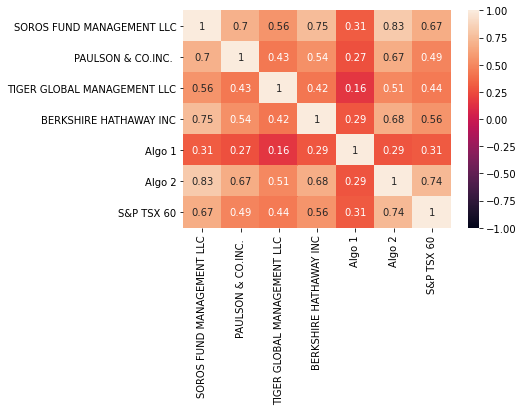

In [31]:
# Use the heatmap function from the Seaborn library to visualize the correlation table

## Import the Seaborn library
import seaborn as sns

## Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'30 Days Rolling Beta - Algo 1'}, xlabel='Date'>

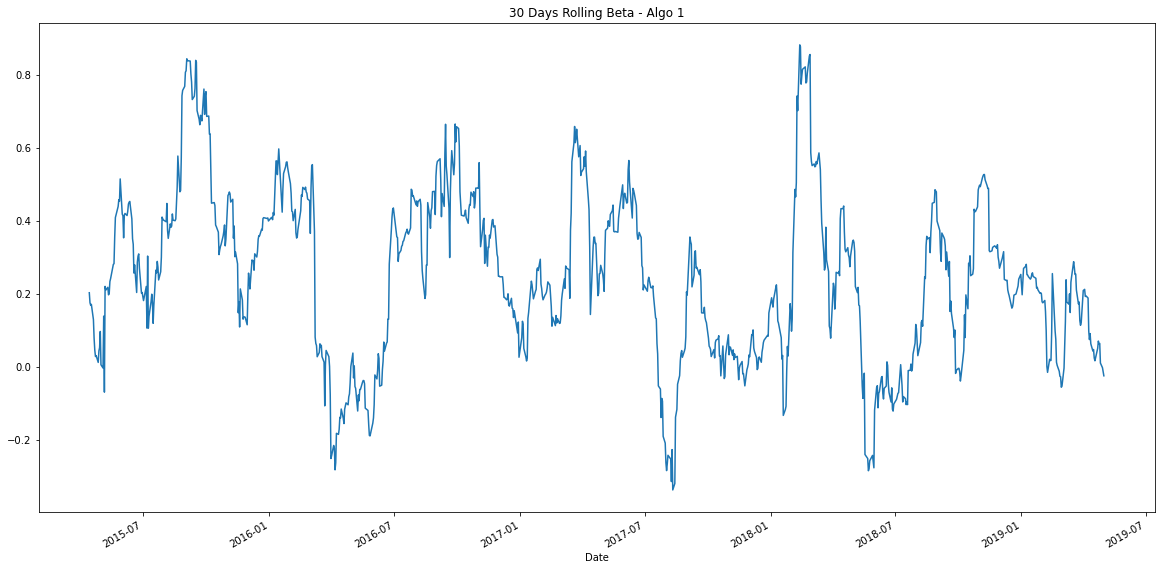

In [32]:
# Calculate covariance of a single portfolio (Algo 1)
covariance = combined_daily_returns["Algo 1"].rolling(window = 30).cov(combined_daily_returns["S&P TSX 60"])

# Calculate variance of S&P TSX
variance_algo_1= combined_daily_returns["Algo 1"].rolling(window = 30).var()

# Computing beta
algo_1_beta_30_days = covariance / variance_algo_1

# Plot beta trend
algo_1_beta_30_days.plot(figsize = (20,10), title="30 Days Rolling Beta - Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [33]:
# Use `ewm` to calculate the rolling window
rolling_21_days_ewm = combined_daily_returns.ewm(halflife=21,min_periods=21).mean()
rolling_21_days_ewm.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998
2019-04-30,0.001402,0.000321,-0.000395,0.002046,0.000725,0.000991,0.000927
2019-05-01,0.001167,0.000268,-0.000639,0.001725,0.000704,0.000720,0.000745


<AxesSubplot:title={'center':'Exponentially Weighted Average - 21 Days Rolling'}, xlabel='Date'>

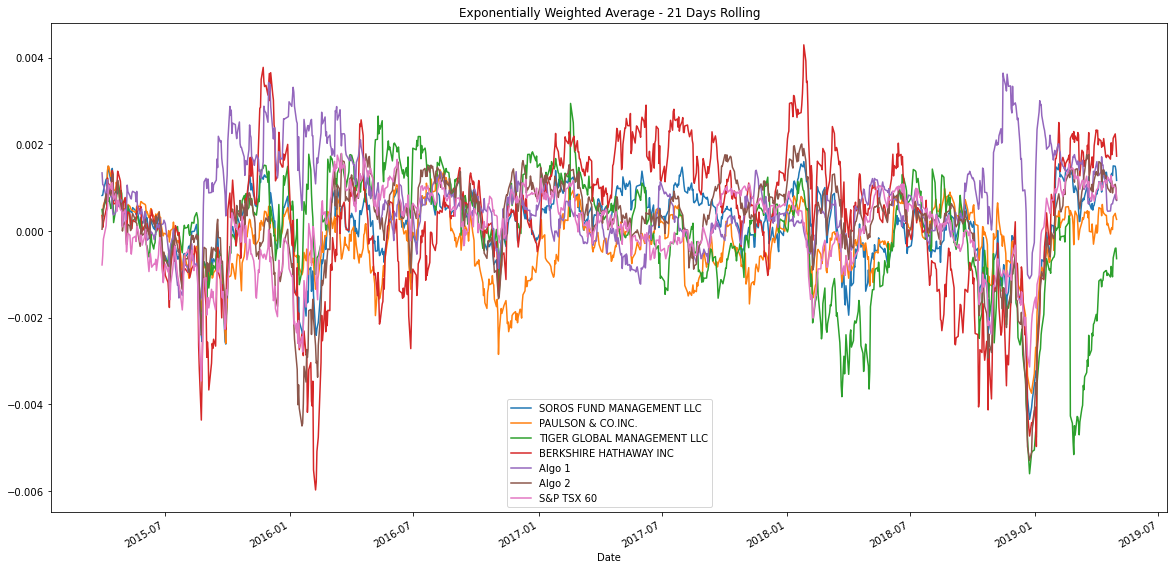

In [34]:
rolling_21_days_ewm.plot(figsize=(20,10), title="Exponentially Weighted Average - 21 Days Rolling")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
risk_free_return_mean = 0
sharpe_ratios = (combined_daily_returns.mean() - risk_free_return_mean) * (252) / (combined_annualized_std)
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P TSX 60                     0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

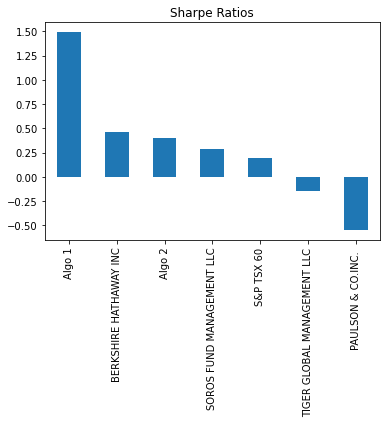

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

# Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

The algorithmic strategies ourperform both market (S&P TSX 60) and the whales portfolios. BERKSHIRE HATHAWAY INC also has a greater return. But, the risk is much higher than algorithmic strategies. 

Algo 1's performance is the best. It has a bigger and more stable increase in return. It also shows a much less risk and smaller volatility.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [37]:
# Reading data from 1st stock
shop_df = pd.read_csv("shop_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df = shop_df.sort_index()
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [38]:
# Check data types
shop_df.dtypes

Symbol     object
Close     float64
dtype: object

In [39]:
# Check null
shop_df.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [40]:
# Reading data from 2nd stock
otex_df = pd.read_csv("otex_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df = otex_df.sort_index()
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [41]:
# Check data type
otex_df.dtypes

Symbol     object
Close     float64
dtype: object

In [42]:
# Check null
otex_df.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [43]:
# Reading data from 3rd stock
l_df = pd.read_csv("l_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df = l_df.sort_index()
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [44]:
# Check data type
l_df.dtypes

Symbol     object
Close     float64
dtype: object

In [45]:
# Check null
l_df.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [46]:
# Combine all stocks in a single DataFrame
combined_3stocks_df = pd.concat([shop_df,otex_df, l_df], axis="rows",join="inner")
combined_3stocks_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [47]:
# Reset Date index
combined_3stocks_df = combined_3stocks_df.reset_index()
combined_3stocks_df

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51
...,...,...,...
1498,2019-12-20,L,67.90
1499,2019-12-23,L,67.68
1500,2019-12-24,L,67.67
1501,2019-12-27,L,67.78


In [48]:
# Reorganize portfolio data by having a column per symbol
combined_3stocks_df = combined_3stocks_df.pivot_table(values="Close", index="Date", columns="Symbol")
combined_3stocks_df

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [49]:
# Calculate daily returns
combined_3stocks_daily_returns = combined_3stocks_df.pct_change()

# Drop NAs
combined_3stocks_daily_returns = combined_3stocks_daily_returns.dropna().copy()

# Display sample data
combined_3stocks_daily_returns.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return_customized = combined_3stocks_daily_returns.dot(weights)

# Display sample data
portfolio_return_customized.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_all_stocks = pd.concat([combined_daily_returns,portfolio_return_customized], axis="columns", join="inner" ).sort_index()
combined_returns_all_stocks.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [52]:
# Rename column names
combined_returns_all_stocks.columns

Index([  'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                        'S&P TSX 60',                             0],
      dtype='object')

In [53]:
combined_returns_all_stocks.columns = ['SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                        'S&P TSX 60','Customized']
combined_returns_all_stocks.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Customized
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_all_stocks.dropna().copy()
combined_returns_all_stocks.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
Customized                     0
dtype: int64

In [55]:
combined_returns_all_stocks

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Customized
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviationcopy

In [56]:
# Calculate the annualized `std`
allstocks_annualized_std = combined_returns_all_stocks.std()*np.sqrt(252)
allstocks_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.227445
Customized                     0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P TSX 60                     0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

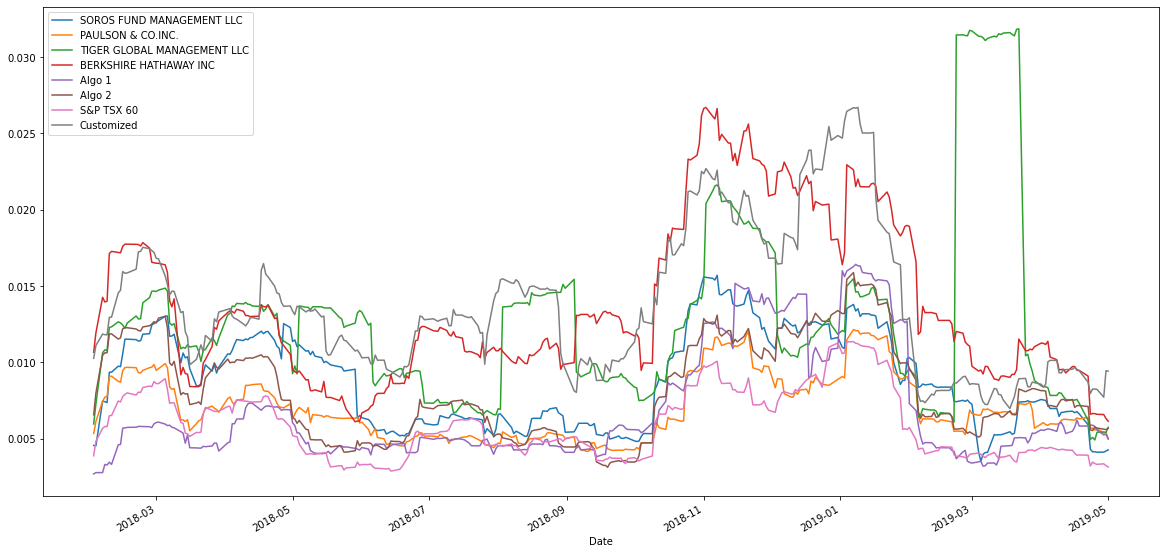

In [57]:
# Calculate rolling standard deviation
allstocks_rolling_21_days_std = combined_returns_all_stocks.rolling(window=21).std()

# Plot rolling standard deviation
allstocks_rolling_21_days_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

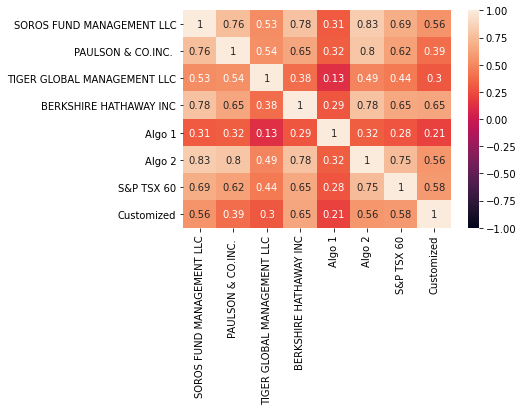

In [58]:
# Calculate and plot the correlation
allstocks_correlation = combined_returns_all_stocks.corr()
sns.heatmap(allstocks_correlation, vmin=-1, vmax=1,annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [59]:
# Calculate and plot Beta
variance_sp_tsx_rolling60 = combined_returns_all_stocks["S&P TSX 60"].rolling(window=60).var()
covariance_customized_rolling60 = combined_returns_all_stocks["Customized"].rolling(window=60).cov(combined_returns_all_stocks["S&P TSX 60"])


<AxesSubplot:title={'center':'60-day Rolling Beta - Customized Portfolio'}, xlabel='Date'>

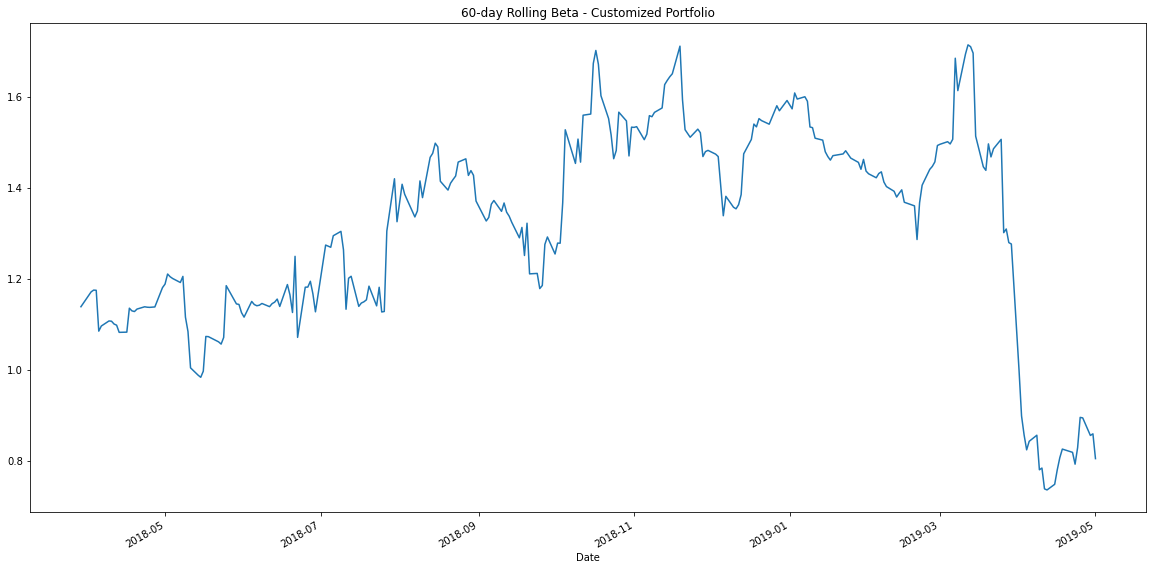

In [60]:
beta_customized_rolling60 = covariance_customized_rolling60 / variance_sp_tsx_rolling60
beta_customized_rolling60.plot(figsize=(20,10), title="60-day Rolling Beta - Customized Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [61]:
# Calculate Annualzied Sharpe Ratios
allstocks_sharpe_ratio = (combined_returns_all_stocks.mean()-risk_free_return_mean) * 252 /(combined_returns_all_stocks.std()*np.sqrt(252))
allstocks_sharpe_ratio = allstocks_sharpe_ratio.sort_values(ascending=False)
allstocks_sharpe_ratio

Algo 1                         1.901461
Customized                     1.564547
BERKSHIRE HATHAWAY INC         0.195907
S&P TSX 60                     0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:>

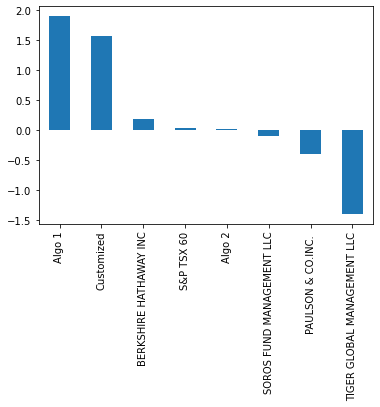

In [62]:
# Visualize the sharpe ratios as a bar plot
allstocks_sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!

The customized portfolio outperforms both the market (S&P TSX 60) and the whales portfolios because it generates a greater profit. But, the customized portfolio has bigger risk and volatility. In contrast, Algo 1 has the highest return but much lower risk.